# Exploring NYC Public School Test Results 
A DataCamp Project in Python 

By Madison Martin

![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

# Project Instructions 
1. Which NYC schools have the best math results?

The best math results are at least 80% of the *maximum possible score of 800* for math.
Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.

2. What are the top 10 performing schools based on the combined SAT scores?

Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order ("total_SAT" being the sum of math, reading, and writing scores).

3. Which single borough has the largest standard deviation in the combined SAT score?

Save your results as a pandas DataFrame called largest_std_dev.
The DataFrame should contain one row, with:
"borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
"num_schools" - the number of schools in the borough.
"average_SAT" - the mean of "total_SAT".
"std_SAT" - the standard deviation of "total_SAT".
Round all numeric values to two decimal places.

# My Solution

In [39]:
# Install the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [40]:
# Which NYC schools have the best math results? 
# first, let's calculate the cutoff
print(.8 * 800) # the scores have to be at least 640

# then, filter for schools that have average higher than 640 and sort
best_math_schools = schools[schools["average_math" ] >= 640].sort_values("average_math", ascending=False)

# show the result 
best_math_schools = best_math_schools[["school_name", "average_math"]]
best_math_schools

640.0


,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


In [41]:
# What are the top 10 performing schools based on the combined SAT scores? 
# mutate new row for combined scores 
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# create the new df for the top schools 
top_10_schools = schools.sort_values("total_SAT", ascending=False).head(n=10)

#show the result
top_10_schools = top_10_schools[["school_name", "total_SAT"]]
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


In [42]:
# Which single borough has the largest standard deviation in the combined SAT score? 
# grouped statistics by borough 
boroughs = schools.groupby("borough")["total_SAT"].agg(['count', 'mean', 'std']).round(2) # remember to round!

# filter for just the top one 
large_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

#rename all of the columns in this final df 
largest_std_dev = large_std_dev.rename(columns={"count":"num_schools", "mean":"average_SAT", "std":"std_SAT"})

# show final answer
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


# Additional Analysis 

I'm interested in the percent_tested variable, and how it connects to other variables like borough or average SAT scores. 

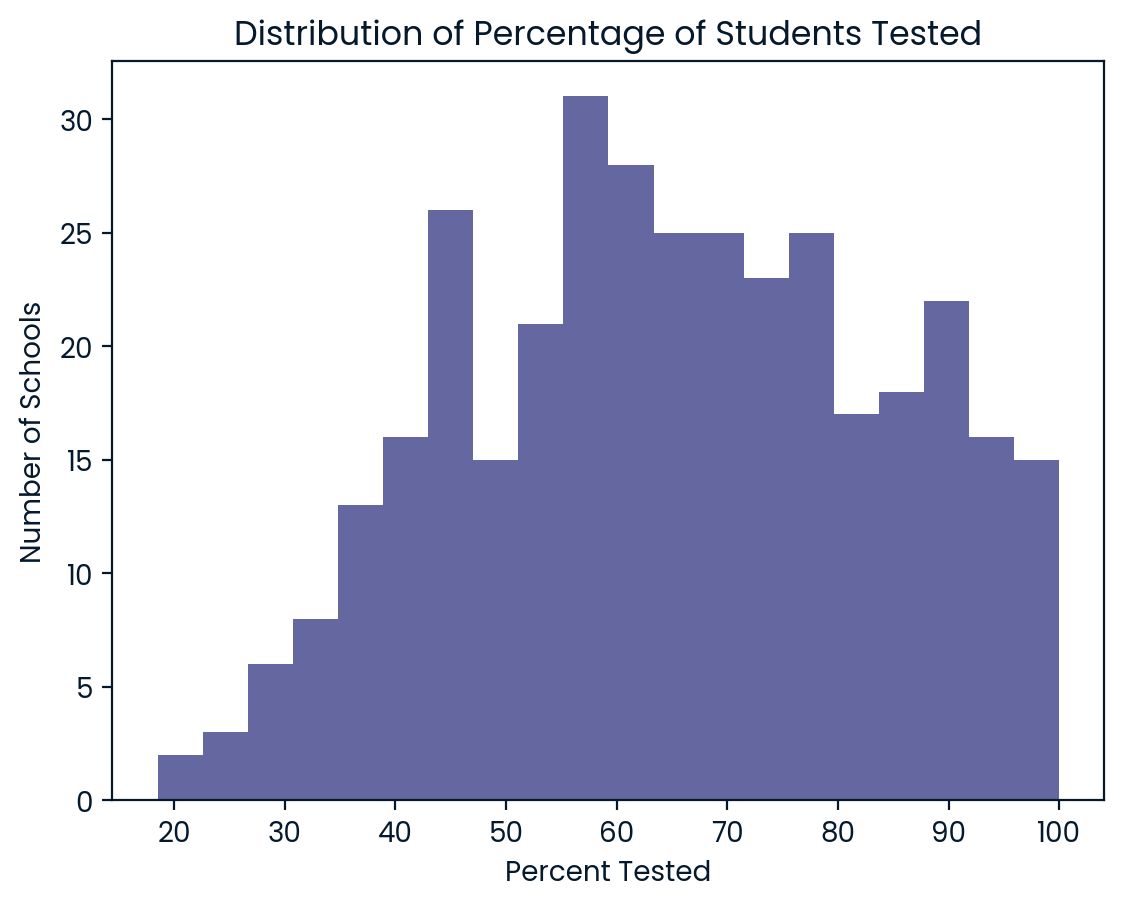

count    355.000000
mean      64.976338
std       18.747634
min       18.500000
25%       50.950000
50%       64.800000
75%       79.600000
max      100.000000
Name: percent_tested, dtype: float64

In [43]:
# first, let's see the distribution of the percentages of students teseted 
plt.hist(schools['percent_tested'], bins = 20)
# let's add some labels to make it more readable
plt.title('Distribution of Percentage of Students Tested')
plt.xlabel('Percent Tested')
plt.ylabel('Number of Schools')
plt.show()

# let's get a little more info about this variable 
schools['percent_tested'].describe()

This variable has much more variance than I would have anticipated. The minimum shows us that at least one school only had 18.5% of students testing for the SAT, while the maximum tells us that some schools had 100% of their students tested. The average percentage of studentds tesetd was 65%. At first, I thought this kind of variability could be explained by a difference in public and private schools (with private schools having more control/influence in the testing and college application processes). However, the title and description of this project asserts these are all public schools. 

Let's take a closer look at how this variable relates to other variables in the data set. 

In [44]:
# percent tested and borough 
percent_by_borough = schools.groupby('borough')["percent_tested"].agg(['min', 'max', 'mean'])
percent_by_borough

,min,max,mean
borough,,,
Bronx,19.2,97.0,58.653763
Brooklyn,18.5,98.1,62.640385
Manhattan,30.6,100.0,71.390476
Queens,26.3,99.2,69.313846
Staten Island,38.0,99.7,66.111111


Earlier in this project, we discovered that Manhattan was the borough with the largest standard deviation in total SAT score, but here we see it also is the best performing borough with percent of students tested. It had both the highest minimum (30.6%) and maximum (100%), as well as the highest average (71.4%). Brooklyn had the lowest minimum (18.5%), while the Bronx had both the lowest maximum (97%) and the lowest average (58.7%). Unfortunately, we do not have information on number of students tested, but in future projects outside data on student enrollment could enrich this analysis. 

In [45]:
# percent tested and total scores 
# is there a correlation? 
# make vectors first 
# have to remove any rows that are na in either variable 
school_clean = schools.dropna(subset=['percent_tested', 'total_SAT'])
x = school_clean['percent_tested']
y = school_clean['total_SAT']

# calculate correlation 
r, p = scipy.stats.pearsonr(x, y)
print(r)
print(p)

0.6038737364634239
1.1881355989013482e-36


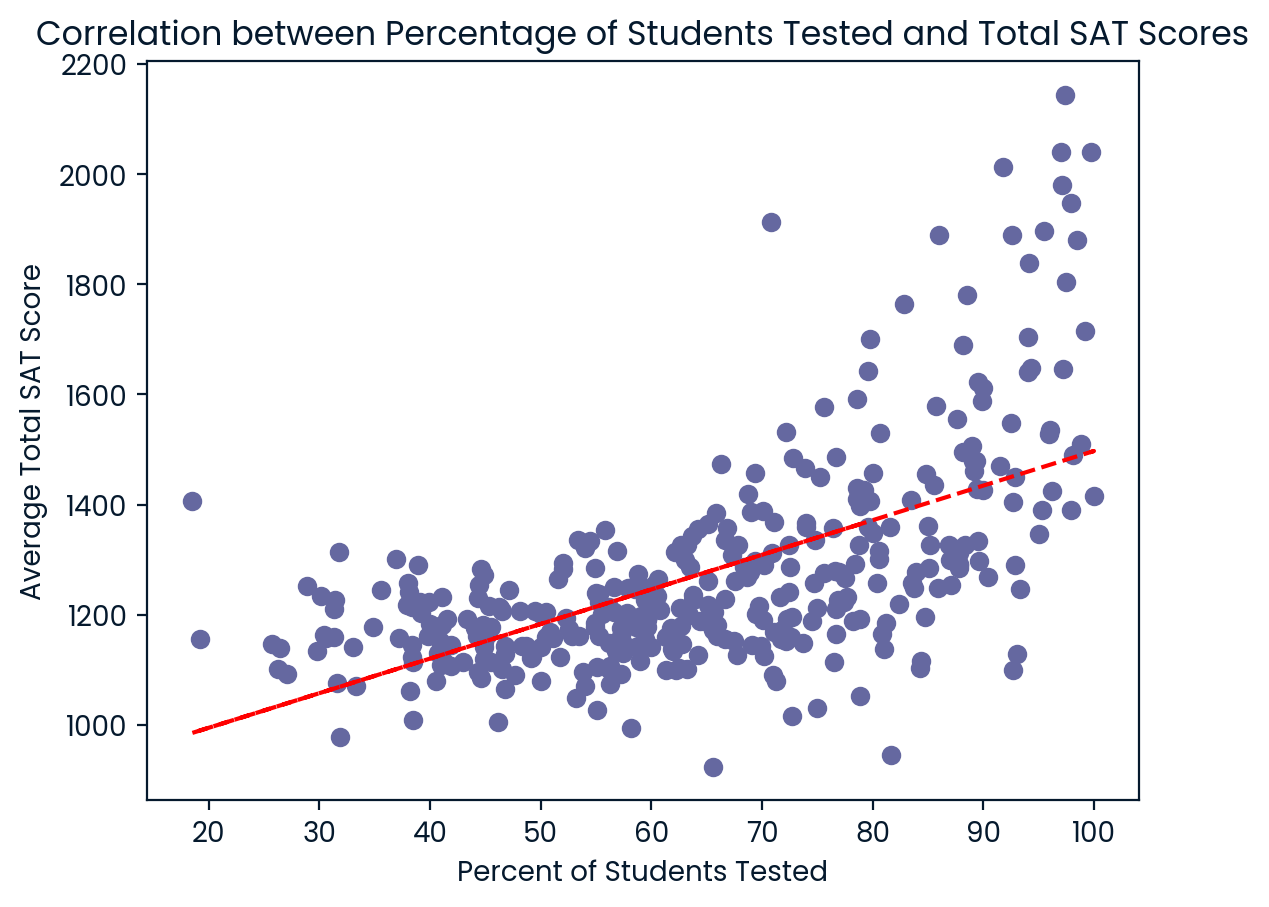

In [46]:
# visualize the correlation 
# prep for best-fit line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# create scatter plot with trendline 
plt.scatter(x,y)
plt.plot(x, p(x), "r--")
plt.title("Correlation between Percentage of Students Tested and Total SAT Scores")
plt.xlabel("Percent of Students Tested")
plt.ylabel("Average Total SAT Score")
plt.show()

There is a statistically significant strong positive correlation (r = .60, p < .001) between percentage of students tested and average total SAT scores. This means that schools who had a higher percentage of their student body taking the SAT tended to have higher average scores, whereas schools where less students took the SAT had lower average scores. 

Based on my additional analysis, I would hypothesize that the demonstrated correlation between these two variables could be reflective of other factors that impact both the perentage of students who take the SAT and standardized testing outcomes, such as socioeconomic background of the student body or amount of funding provided to each school. 